<a href="https://colab.research.google.com/github/mohamed-mkh15/Pose-estimation-Aruco-RGBD-camera-/blob/main/generate_aruco_markers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Method #1


In [1]:
import cv2
import os

def create_folder(path):
  if not os.path.isdir(path):
   os.makedirs(path)

def generate_and_export_batch(aruco_dict, max_count, output_folder, ext):
  for i in range(0, max_count):
    marker = cv2.aruco.generateImageMarker(aruco_dict, i, marker_size)
    output_path = os.path.join(output_folder, "marker_" + str('%03d' % i) + ext)
    cv2.imwrite(output_path, marker)

def generate_aruco_markers(dict_code, count, output_folder, ext):
  if count <= 0:
    print("Invalid input count", count)
    return

  aruco_dict = cv2.aruco.getPredefinedDictionary(dict_code)
  real_max_count = min(count, len(aruco_dict.bytesList))

  print("Generating " , real_max_count, " markers...")
  generate_and_export_batch(aruco_dict, real_max_count, output_folder, ext)
  print("Generation completed!")

In [23]:
#@markdown Aruco Generation
predefined_dict = "cv2.aruco.DICT_4X4_50" #@param ["cv2.aruco.DICT_4X4_50","cv2.aruco.DICT_4X4_100","cv2.aruco.DICT_4X4_250","cv2.aruco.DICT_4X4_1000","cv2.aruco.DICT_5X5_50","cv2.aruco.DICT_5X5_100","cv2.aruco.DICT_5X5_250","cv2.aruco.DICT_5X5_1000","cv2.aruco.DICT_6X6_50","cv2.aruco.DICT_6X6_100","cv2.aruco.DICT_6X6_250","cv2.aruco.DICT_6X6_1000","cv2.aruco.DICT_7X7_50","cv2.aruco.DICT_7X7_100","cv2.aruco.DICT_7X7_250","cv2.aruco.DICT_7X7_1000","cv2.aruco.DICT_ARUCO_ORIGINAL","cv2.aruco.DICT_APRILTAG_16h5","cv2.aruco.DICT_APRILTAG_25h9","cv2.aruco.DICT_APRILTAG_36h10","cv2.aruco.DICT_APRILTAG_36h11"]
max_tags = 4 #@param {type:"number"}

#@markdown Marker settings
marker_size = 256 #@param {type:"slider", min:48, max:2048, step:2}
marker_extension = ".png" #@param [".png", ".jpg"]

In [ ]:
output_dir = "output"
create_folder(output_dir)
generate_aruco_markers(eval(predefined_dict), max_tags, output_dir, marker_extension)

## Method #2

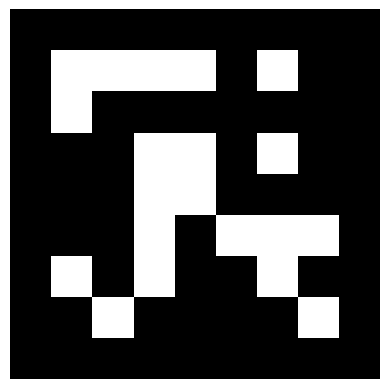

True

In [ ]:
import cv2
import matplotlib.pyplot as plt

ID = 10 # ID of ArUCo tag to generate
Type = "DICT_7X7_100" # default=DICT_ARUCO_ORIGINAL # type of ArUCo tag to generate
img_size = 700 # Define the size of the final image

# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(Type, None) is None:
    print("[INFO] ArUCo tag of '{}' is not supported".format(Type))
    sys.exit(0)
# load the ArUCo dictionary
arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[Type])
# arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

marker_img = cv2.aruco.generateImageMarker(arucoDict, ID, img_size)

plt.imshow(marker_img, cmap='gray', interpolation="nearest")
plt.axis("off")
plt.show()

cv2.imwrite("aruco{}.png".format(id), marker_img)